# WeatherPy

---

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from datetime import datetime
from scipy.stats import linregress


# Import the OpenWeatherMap API key
from api_key import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 612


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

#Set units for search
units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | north bondi
Processing Record 2 of Set 1 | infantes
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | tupancireta
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | divino das laranjeiras
Processing Record 8 of Set 1 | olonkinbyen
Processing Record 9 of Set 1 | aykhal
Processing Record 10 of Set 1 | badger
Processing Record 11 of Set 1 | saksaul'skiy
City not found. Skipping...
Processing Record 12 of Set 1 | hamilton
Processing Record 13 of Set 1 | mount pearl
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | novoshcherbinovskaya
Processing Record 18 of Set 1 | nirmali
Processing Record 19 of Set 1 | lihue
Processing Record 20 of Set 1 | alexandria
Processing Record 21 of Set 1 | nowshahr
Proces

Processing Record 40 of Set 4 | tazovsky
Processing Record 41 of Set 4 | port alfred
Processing Record 42 of Set 4 | vorkuta
Processing Record 43 of Set 4 | palikir - national government center
Processing Record 44 of Set 4 | portland
Processing Record 45 of Set 4 | fuxin
Processing Record 46 of Set 4 | queenstown
Processing Record 47 of Set 4 | talnakh
Processing Record 48 of Set 4 | borzya
Processing Record 49 of Set 4 | ahau
City not found. Skipping...
Processing Record 0 of Set 5 | chalon-sur-saone
Processing Record 1 of Set 5 | mogok
Processing Record 2 of Set 5 | ola
Processing Record 3 of Set 5 | barah
Processing Record 4 of Set 5 | nova xavantina
Processing Record 5 of Set 5 | shwebo
Processing Record 6 of Set 5 | borogontsy
Processing Record 7 of Set 5 | young
Processing Record 8 of Set 5 | dimapur
Processing Record 9 of Set 5 | isla vista
Processing Record 10 of Set 5 | shakawe
Processing Record 11 of Set 5 | keflavik
Processing Record 12 of Set 5 | colonia
Processing Record 

Processing Record 29 of Set 8 | libreville
Processing Record 30 of Set 8 | constantia
Processing Record 31 of Set 8 | nizhnyaya tavda
Processing Record 32 of Set 8 | puerto baquerizo moreno
Processing Record 33 of Set 8 | mezhdurechenskiy
Processing Record 34 of Set 8 | priargunsk
Processing Record 35 of Set 8 | santo tome
Processing Record 36 of Set 8 | shahrud
Processing Record 37 of Set 8 | codrington
Processing Record 38 of Set 8 | astaneh-ye ashrafiyeh
Processing Record 39 of Set 8 | west fargo
Processing Record 40 of Set 8 | laayoune plage
City not found. Skipping...
Processing Record 41 of Set 8 | cargados carajos
City not found. Skipping...
Processing Record 42 of Set 8 | zaltan
Processing Record 43 of Set 8 | fortuna
Processing Record 44 of Set 8 | axim
Processing Record 45 of Set 8 | kapit
Processing Record 46 of Set 8 | baidoa
Processing Record 47 of Set 8 | timiryazevskoye
Processing Record 48 of Set 8 | novodvinsk
Processing Record 49 of Set 8 | gumi
Processing Record 0 of

Processing Record 18 of Set 12 | ghat
Processing Record 19 of Set 12 | salalah
Processing Record 20 of Set 12 | fayzabad
Processing Record 21 of Set 12 | ust'-ilimsk
Processing Record 22 of Set 12 | penhalonga
Processing Record 23 of Set 12 | malakal
Processing Record 24 of Set 12 | yangor
City not found. Skipping...
Processing Record 25 of Set 12 | christchurch
Processing Record 26 of Set 12 | nushki
Processing Record 27 of Set 12 | dalandzadgad
Processing Record 28 of Set 12 | bagan serai
Processing Record 29 of Set 12 | parintins
Processing Record 30 of Set 12 | ijuw
City not found. Skipping...
Processing Record 31 of Set 12 | bria
Processing Record 32 of Set 12 | villa union
Processing Record 33 of Set 12 | byakabanda
Processing Record 34 of Set 12 | cururupu
Processing Record 35 of Set 12 | malvan
Processing Record 36 of Set 12 | walvis bay
Processing Record 37 of Set 12 | kitimat
Processing Record 38 of Set 12 | carrizo springs
Processing Record 39 of Set 12 | tadine
Processing R

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          584
Lat           584
Lng           584
Max Temp      584
Humidity      584
Cloudiness    584
Wind Speed    584
Country       584
Date          584
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,north bondi,-33.8824,151.2769,22.39,84,100,3.09,AU,1702227831
1,infantes,38.7367,-3.0122,10.56,76,19,2.93,ES,1702227831
2,grytviken,-54.2811,-36.5092,7.48,87,100,2.79,GS,1702227625
3,wailua homesteads,22.0669,-159.3780,21.53,82,23,0.45,US,1702227629
4,tupancireta,-29.0806,-53.8358,22.24,81,97,3.39,BR,1702227832


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,north bondi,-33.8824,151.2769,22.39,84,100,3.09,AU,1702227831
1,infantes,38.7367,-3.0122,10.56,76,19,2.93,ES,1702227831
2,grytviken,-54.2811,-36.5092,7.48,87,100,2.79,GS,1702227625
3,wailua homesteads,22.0669,-159.3780,21.53,82,23,0.45,US,1702227629
4,tupancireta,-29.0806,-53.8358,22.24,81,97,3.39,BR,1702227832


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

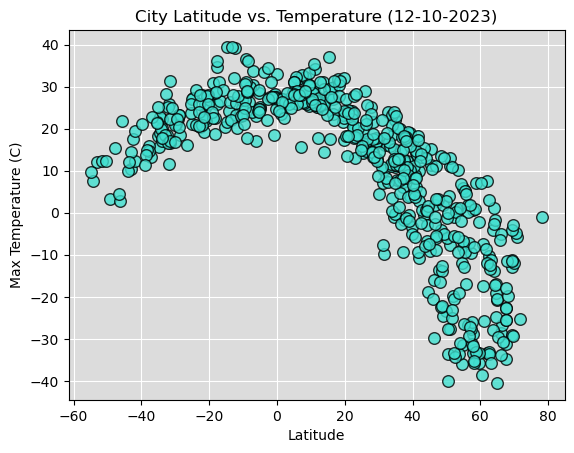

In [19]:
# Build scatter plot for latitude vs. temperature
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=.8, color="turquoise", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Temperature ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

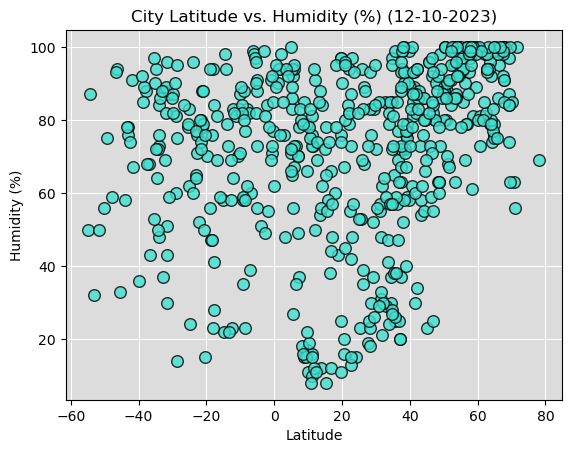

In [20]:
# Build the scatter plots for latitude vs. humidity
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=.8, color="turquoise", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (%) ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

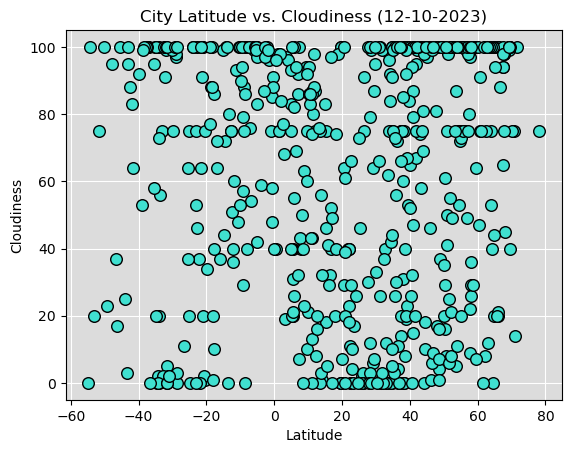

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color="turquoise", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

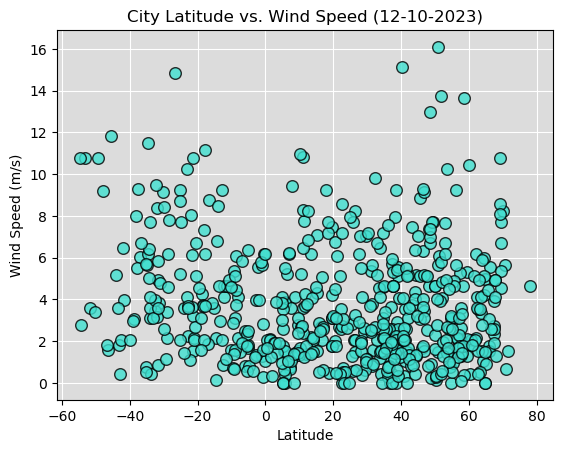

In [22]:
# Build the scatter plots for latitude vs. wind speed
plt.axes(facecolor='gainsboro')
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=.8, color="turquoise", edgecolors="k", s=[70], zorder=3)

#Format date
date = datetime.now()
date = date.strftime("%m-%d-%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.grid(True, color='w', linestyle='solid', zorder=1) 


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [39]:
# Define a function to create Linear Regression plots

def latitude_regress(df, x_Col, y_Col):
    
    # Perform the linear regression on the data
    (regr_slope, regr_intercept, regr_r_val, _, _) = linregress(df[x_Col], df[y_Col])
    
    # Set up x and y axes data points
    regr_line_x = np.array([a for a in range(int(min(df[x_Col].values)), int(max(df[x_Col].values)+1))])
    regr_line_y = regr_slope * regr_line_x + regr_intercept

    # Create scatterplot
    df_axes = df.plot(kind="scatter", x=x_Col, y=y_Col, color="turquoise", edgecolors="k", alpha=.8, s=[70], zorder=3)
    plt.grid(True, color='gainsboro', linestyle='solid', zorder=1) 

    # Add the best fit line
    df_axes.plot(regr_line_x, regr_line_y, 'r-', zorder=4)

    # Output linear regression info
    print(" ")
    print("The equation of the best-fit linear regression line for this chart is y={:.2f}x+{:.2f}"
          .format(regr_slope, regr_intercept))
    print(" ")
    print("The r-squared correlation coefficient for this line is {:.2f}".format(regr_r_val))
                  
    # Return the axes object for the plots, in case any changes need to be made
    return df_axes

In [40]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,infantes,38.7367,-3.0122,10.56,76,19,2.93,ES,1702227831
3,wailua homesteads,22.0669,-159.3780,21.53,82,23,0.45,US,1702227629
7,olonkinbyen,70.9221,-8.7187,-5.87,56,14,0.68,SJ,1702227670
8,aykhal,66.0000,111.5000,-28.63,99,100,1.76,RU,1702227599
9,badger,64.8000,-147.5333,-20.66,76,100,0.00,US,1702227647


In [41]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,north bondi,-33.8824,151.2769,22.39,84,100,3.09,AU,1702227831
2,grytviken,-54.2811,-36.5092,7.48,87,100,2.79,GS,1702227625
4,tupancireta,-29.0806,-53.8358,22.24,81,97,3.39,BR,1702227832
5,adamstown,-25.0660,-130.1015,21.02,62,75,5.24,PN,1702227598
6,divino das laranjeiras,-18.7778,-41.4797,30.93,47,88,4.24,BR,1702227833


###  Temperature vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=-0.85x+37.65
 
The r-squared correlation coefficient for this line is -0.84


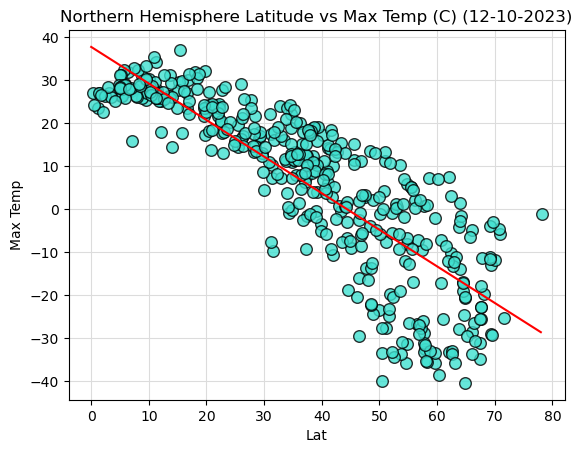

In [42]:
# Linear regression on Northern Hemisphere
northern_regress = latitude_regress(northern_hemi_df, "Lat", "Max Temp")
plt.title(f"Northern Hemisphere Latitude vs Max Temp (C) ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=0.34x+30.66
 
The r-squared correlation coefficient for this line is 0.71


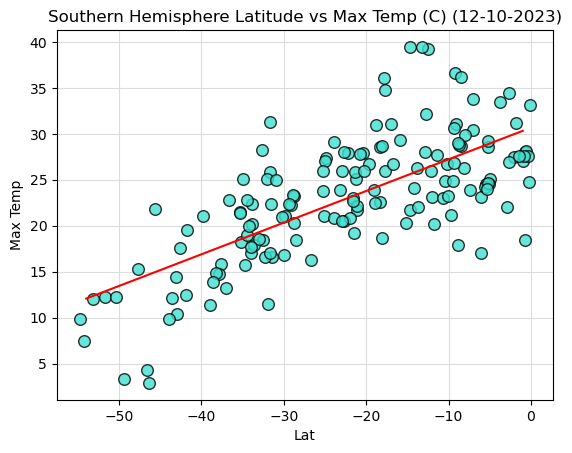

In [43]:
# Linear regression on Southern Hemisphere
southern_regress = latitudeRegression(southern_hemi_df, "Lat", "Max Temp")
plt.title(f"Southern Hemisphere Latitude vs Max Temp (C) ({date})")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=0.52x+53.38
 
The r-squared correlation coefficient for this line is 0.41


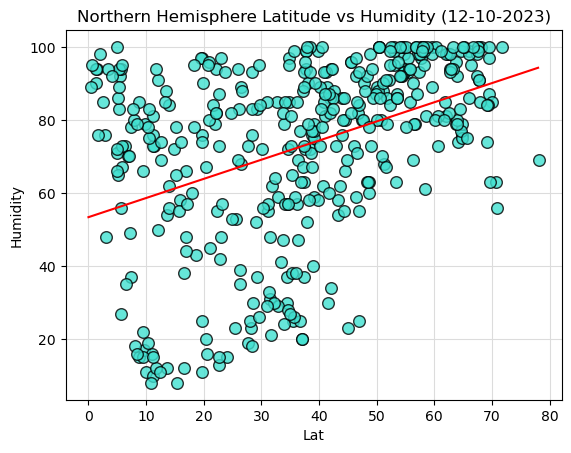

In [44]:
# Northern Hemisphere
northern_regress_humidity = latitudeRegression(northern_hemi_df, "Lat", "Humidity")
plt.title(f"Northern Hemisphere Latitude vs Humidity ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=0.10x+72.62
 
The r-squared correlation coefficient for this line is 0.07


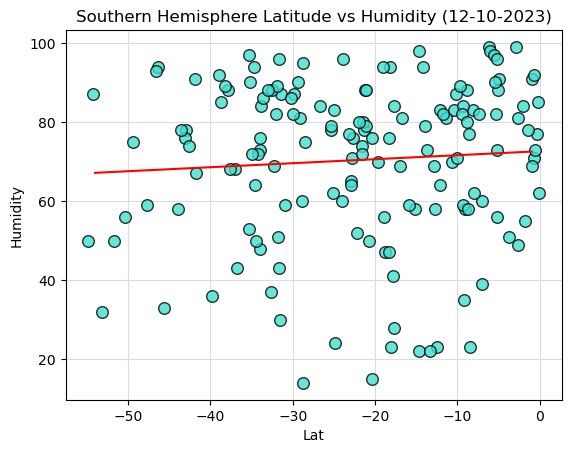

In [45]:
# Southern Hemisphere
southern_regress_humidity = latitudeRegression(southern_hemi_df, "Lat", "Humidity")
plt.title(f"Southern Hemisphere Latitude vs Humidity ({date})")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=0.47x+41.97
 
The r-squared correlation coefficient for this line is 0.24


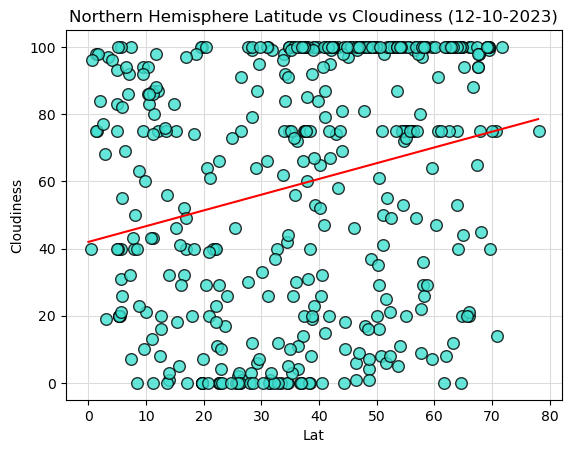

In [46]:
# Northern Hemisphere
northern_regress_clouds = latitudeRegression(northern_hemi_df, "Lat", "Cloudiness")
plt.title(f"Northern Hemisphere Latitude vs Cloudiness ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=0.52x+76.80
 
The r-squared correlation coefficient for this line is 0.20


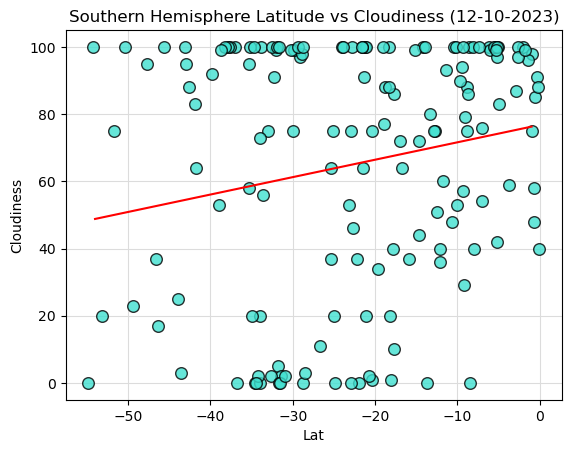

In [47]:
# Southern Hemisphere
southern_regress_clouds = latitudeRegression(southern_hemi_df, "Lat", "Cloudiness")
plt.title(f"Southern Hemisphere Latitude vs Cloudiness ({date})")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

 
The equation of the best-fit linear regression line for this chart is y=0.01x+2.83
 
The r-squared correlation coefficient for this line is 0.10


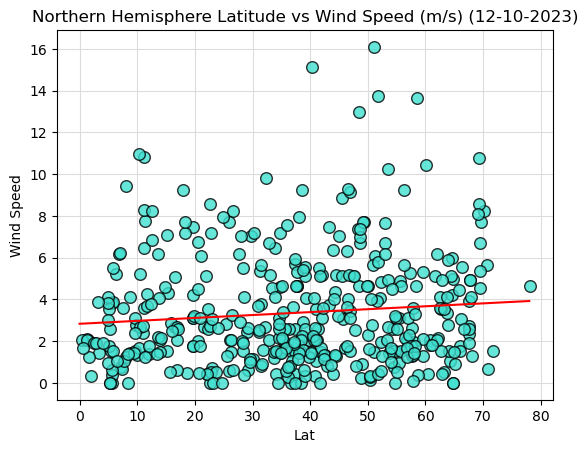

In [48]:
# Northern Hemisphere
northern_regress_wind = latitudeRegression(northern_hemi_df, "Lat", "Wind Speed")
plt.title(f"Northern Hemisphere Latitude vs Wind Speed (m/s) ({date})")
plt.show()

 
The equation of the best-fit linear regression line for this chart is y=-0.06x+3.00
 
The r-squared correlation coefficient for this line is -0.29


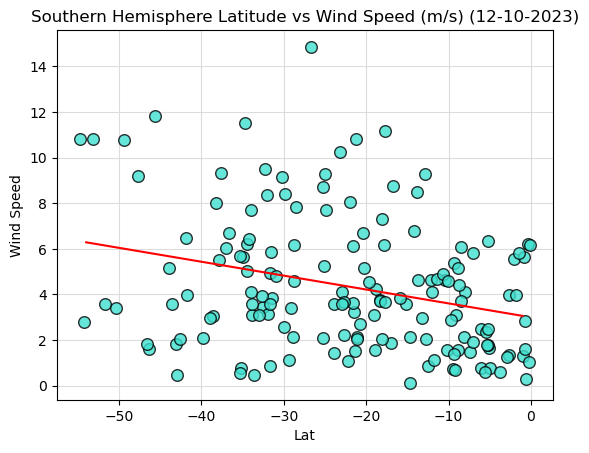

In [49]:
# Southern Hemisphere
southern_regress_wind = latitudeRegression(southern_hemi_df, "Lat", "Wind Speed")
plt.title(f"Southern Hemisphere Latitude vs Wind Speed (m/s) ({date})")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE